## Problem Statement

Our goal is to look at transcripts LOKI(TV Series) episodes and note their similarities and differences.
Whether different style are used.

So I stumbled upon this beautiful comedy analysis, I thought why not try it out on a TV series I had binged some time ago.

### Getting the data

In [2]:
#web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

#scraping transcript from scrapsfromtheloft.com
def url_to_transcript(url):
    page = requests.get(url).text
    soup = BeautifulSoup(page, 'lxml')
    
    text = [p.text for p in soup.find(class_='content-area primary').find_all('p')]
    title = soup.find(class_='content-area primary').h1.text
    print(url)
    return text, title

#url of transcripts
urls = ['https://scrapsfromtheloft.com/2021/06/10/loki-s01e01-glorious-purpose-transcript/',
        'https://scrapsfromtheloft.com/2021/06/16/loki-s01e02-the-variant-transcript/',
        'https://scrapsfromtheloft.com/2021/06/23/loki-s01e03-lamentis-transcript/',
        'https://scrapsfromtheloft.com/2021/06/30/loki-s01e04-the-nexus-event-transcript/',
        'https://scrapsfromtheloft.com/2021/07/08/loki-s01e05-journey-into-mystery-transcript/',
        'https://scrapsfromtheloft.com/2021/07/14/loki-s01e06-for-all-time-always-transcript/']

In [3]:
#requesting transcripts

transcripts=[]
titles=[]
for i in range(len(urls)):
    transcript, title = url_to_transcript(urls[i])
    transcripts.append(transcript)
    titles.append(title)
    print(title)

https://scrapsfromtheloft.com/2021/06/10/loki-s01e01-glorious-purpose-transcript/
Loki – S01E01 – Glorious Purpose [Transcript]
https://scrapsfromtheloft.com/2021/06/16/loki-s01e02-the-variant-transcript/
Loki – S01E02 – The Variant [Transcript]
https://scrapsfromtheloft.com/2021/06/23/loki-s01e03-lamentis-transcript/
Loki – S01E03 – Lamentis [Transcript]
https://scrapsfromtheloft.com/2021/06/30/loki-s01e04-the-nexus-event-transcript/
Loki – S01E04 – The Nexus Event [Transcript]
https://scrapsfromtheloft.com/2021/07/08/loki-s01e05-journey-into-mystery-transcript/
Loki – S01E05 – Journey into Mystery [Transcript]
https://scrapsfromtheloft.com/2021/07/14/loki-s01e06-for-all-time-always-transcript/
Loki – S01E06 – For All Time. Always [Transcript]


In [4]:
#removing text in square brackets in titles

import re

titles = [re.sub('\[.*?\]', '', title) for title in titles]

In [5]:
titles

['Loki – S01E01 – Glorious Purpose ',
 'Loki – S01E02 – The Variant ',
 'Loki – S01E03 – Lamentis ',
 'Loki – S01E04 – The Nexus Event ',
 'Loki – S01E05 – Journey into Mystery ',
 'Loki – S01E06 – For All Time. Always ']

In [6]:
#making a new directory to hold text files
!mkdir transcripts

A subdirectory or file transcripts already exists.


In [7]:
#pickling files for later use

for i, c in enumerate(titles):
    with open('transcripts/'+ c +'.txt', 'wb') as file:
        pickle.dump(transcripts[i], file)

In [8]:
data = {}
for i,c in enumerate(titles):
    data[c] = transcripts[i]
    
data.keys()

dict_keys(['Loki – S01E01 – Glorious Purpose ', 'Loki – S01E02 – The Variant ', 'Loki – S01E03 – Lamentis ', 'Loki – S01E04 – The Nexus Event ', 'Loki – S01E05 – Journey into Mystery ', 'Loki – S01E06 – For All Time. Always '])

### Cleaning the data

*make lower *remove punctuation *remove numrical values *remove common non-sensical text(/n) *tokenize text *remove stopwords

More data cleaning steps!
*stemming/lemmatization *parts of speech tagging *create bi-grams or tri-grams 
*deal with typos

In [9]:
next(iter(data.keys()))

'Loki – S01E01 – Glorious Purpose '

In [10]:
next(iter(data.values()))

['Original release date\u200a: June 9, 2021',
 'In the Gobi Desert, Mongolia, an alternative timeline version of Loki is captured by the Time Variance Authority (TVA) after escaping from the Battle of New York with the Tesseract in 2012. In the TVA’s headquarters, Judge Ravonna Renslayer accuses him of crimes against the Sacred Timeline. Loki believes the TVA should suspect the Avengers, as they went back in time, causing him to end up in this situation. However, Renslayer counters this by saying the Avengers’ mission was meant to happen, but Loki’s escape was not. Following this, Agent Mobius M. Mobius takes Loki to the Time Theatre to review Loki’s past misdeeds and question his habit of killing and hurting people. Loki steals TVA tech to retrieve the Tesseract, but gives up escaping upon realizing that the TVA’s power exceeds his and that of the Infinity Stones. Loki returns to the Time Theatre and witnesses a recording of his soon-would be future of his adoptive parents, Frigga and

Our dictionary is currently in key:title, value:list of text format. We are going to change this to key:title, value:string format

In [11]:
def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

In [12]:
#combine it
data_combined = {key: [combine_text(value)] for key, value in data.items()}

In [13]:
# we can convert into pandas dataframe

import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
Loki – S01E01 – Glorious Purpose,"Original release date : June 9, 2021 In the Gobi Desert, Mongolia, an alternative timeline version of Loki is captured by the Time Variance Author..."
Loki – S01E02 – The Variant,"Original release date : June 16, 2021 Loki joins a TVA mission following an ambush by the fugitive Variant of Loki in 1985 Oshkosh, Wisconsin. He ..."
Loki – S01E03 – Lamentis,"Original release date : June 23, 2021 Loki follows the Variant, whose name is Sylvie, to the TVA, where they are confronted by Renslayer, before e..."
Loki – S01E04 – The Nexus Event,"Original release date : June 30, 2021 On Lamentis-1, Sylvie tells Loki she escaped the TVA’s detention as a child. In the present, Renslayer infor..."
Loki – S01E05 – Journey into Mystery,"Original release date : July 7, 2021 Sylvie learns from Renslayer that Loki was teleported to the Void, a dimension at the end of Time where every..."
Loki – S01E06 – For All Time. Always,"Original release date : July 14, 2021 In the Citadel at the End of Time, Loki and Sylvie meet Miss Minutes, rejecting an offer from her master, “H..."


In [14]:
#apply round of text cleaning techniques

import re
import string

def clean_text_round1(text):
    text = text.lower() #makes text lowercase
    text = re.sub('\[.*?\]', '', text) #removing text in square bracket
    text = re.sub('[%s]' %re.escape(string.punctuation),'',text) #removing punctutation
    text = re.sub('\w*\d\w*','',text) #removing words containing numbers
    return text

round1 = lambda x:clean_text_round1(x)

In [15]:
#lets update our text and take  a look at it
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
Loki – S01E01 – Glorious Purpose,original release date june in the gobi desert mongolia an alternative timeline version of loki is captured by the time variance authority tva a...
Loki – S01E02 – The Variant,original release date june loki joins a tva mission following an ambush by the fugitive variant of loki in oshkosh wisconsin he wants assuranc...
Loki – S01E03 – Lamentis,original release date june loki follows the variant whose name is sylvie to the tva where they are confronted by renslayer before escaping usin...
Loki – S01E04 – The Nexus Event,original release date june on sylvie tells loki she escaped the tva’s detention as a child in the present renslayer informs mobius about hunte...
Loki – S01E05 – Journey into Mystery,original release date july sylvie learns from renslayer that loki was teleported to the void a dimension at the end of time where everything th...
Loki – S01E06 – For All Time. Always,original release date july in the citadel at the end of time loki and sylvie meet miss minutes rejecting an offer from her master “he who remai...


In [16]:
#applying second round of cleaning

def clean_second_round2(text):
    text = re.sub('[''""...]','',text) #gettin rid of additional punctutation
    text = re.sub('\n','',text) 
    return text

round2 = lambda x: clean_second_round2(x)

In [17]:
#looking at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
Loki – S01E01 – Glorious Purpose,original release date june in the gobi desert mongolia an alternative timeline version of loki is captured by the time variance authority tva a...
Loki – S01E02 – The Variant,original release date june loki joins a tva mission following an ambush by the fugitive variant of loki in oshkosh wisconsin he wants assuranc...
Loki – S01E03 – Lamentis,original release date june loki follows the variant whose name is sylvie to the tva where they are confronted by renslayer before escaping usin...
Loki – S01E04 – The Nexus Event,original release date june on sylvie tells loki she escaped the tva’s detention as a child in the present renslayer informs mobius about hunte...
Loki – S01E05 – Journey into Mystery,original release date july sylvie learns from renslayer that loki was teleported to the void a dimension at the end of time where everything th...
Loki – S01E06 – For All Time. Always,original release date july in the citadel at the end of time loki and sylvie meet miss minutes rejecting an offer from her master “he who remai...


We can go on with the cleaning such as:

    *Mark cheering and cheer as the same word
    *Combine thank you into one term(bi-grams)
But lets continue with this cleaning.

### Organizing the data

*Corpus : A collection of text

*Documnet-Term Matrix : word counts in matrix format

In [60]:
###Corpus

In [18]:
data_df

,transcript
Loki – S01E01 – Glorious Purpose,"Original release date : June 9, 2021 In the Gobi Desert, Mongolia, an alternative timeline version of Loki is captured by the Time Variance Author..."
Loki – S01E02 – The Variant,"Original release date : June 16, 2021 Loki joins a TVA mission following an ambush by the fugitive Variant of Loki in 1985 Oshkosh, Wisconsin. He ..."
Loki – S01E03 – Lamentis,"Original release date : June 23, 2021 Loki follows the Variant, whose name is Sylvie, to the TVA, where they are confronted by Renslayer, before e..."
Loki – S01E04 – The Nexus Event,"Original release date : June 30, 2021 On Lamentis-1, Sylvie tells Loki she escaped the TVA’s detention as a child. In the present, Renslayer infor..."
Loki – S01E05 – Journey into Mystery,"Original release date : July 7, 2021 Sylvie learns from Renslayer that Loki was teleported to the Void, a dimension at the end of Time where every..."
Loki – S01E06 – For All Time. Always,"Original release date : July 14, 2021 In the Citadel at the End of Time, Loki and Sylvie meet Miss Minutes, rejecting an offer from her master, “H..."


In [19]:
data_df.index.tolist()

['Loki – S01E01 – Glorious Purpose ',
 'Loki – S01E02 – The Variant ',
 'Loki – S01E03 – Lamentis ',
 'Loki – S01E04 – The Nexus Event ',
 'Loki – S01E05 – Journey into Mystery ',
 'Loki – S01E06 – For All Time. Always ']

In [20]:
#let's add episode name and numbered episode

episode=[]
name = []
for data in data_df.index.tolist():
    data = data.split('–')
    episode.append(data[1])
    #data1 = data[2]
    #data1 = data1.split(' ')
    #data1.pop(-1)
    data1 =  ' '.join(data[2])
    name.append(data1)
    
data_df['Episode'] = episode
data_df['Name'] = name
data_df.reset_index(drop=True, inplace=True)

In [21]:
data_df

,transcript,Episode,Name
0,"Original release date : June 9, 2021 In the Gobi Desert, Mongolia, an alternative timeline version of Loki is captured by the Time Variance Author...",S01E01,G l o r i o u s P u r p o s e
1,"Original release date : June 16, 2021 Loki joins a TVA mission following an ambush by the fugitive Variant of Loki in 1985 Oshkosh, Wisconsin. He ...",S01E02,T h e V a r i a n t
2,"Original release date : June 23, 2021 Loki follows the Variant, whose name is Sylvie, to the TVA, where they are confronted by Renslayer, before e...",S01E03,L a m e n t i s
3,"Original release date : June 30, 2021 On Lamentis-1, Sylvie tells Loki she escaped the TVA’s detention as a child. In the present, Renslayer infor...",S01E04,T h e N e x u s E v e n t
4,"Original release date : July 7, 2021 Sylvie learns from Renslayer that Loki was teleported to the Void, a dimension at the end of Time where every...",S01E05,J o u r n e y i n t o M y s t e r y
5,"Original release date : July 14, 2021 In the Citadel at the End of Time, Loki and Sylvie meet Miss Minutes, rejecting an offer from her master, “H...",S01E06,F o r A l l T i m e . A l w a y s


In [22]:
data_df['transcript'][1]

'Original release date\u200a: June 16, 2021 Loki joins a TVA mission following an ambush by the fugitive Variant of Loki in 1985\xa0Oshkosh, Wisconsin. He wants assurance that the TVA will let him meet the Time Keepers instead of disintegrating him, but Mobius figures out that he is stalling. Back at the TVA headquarters, Mobius convinces Renslayer to give Loki another chance. After research, Loki proposes that the Variant is hiding in spacetime near apocalyptic events like\xa0Asgard’s\xa0Ragnarok, where the impending destruction means their actions cannot change the timeline, thus concealing them from the TVA. Loki and Mobius confirm this possibility by visiting\xa0Pompeii in 79 AD. The duo then figure out that the Variant is at a\xa0hurricane\xa0in 2050\xa0Alabama. Loki, Mobius, and TVA agents travel there. The Variant ambushes them, using\xa0body possession\xa0to control TVA’s Hunter B-15 and other locals. The Variant rejects Loki’s offer for them to work together to overthrow the T

In [23]:
#pickling for later use
data_df.to_pickle('corpus.pkl')

In [24]:
#we have already created our corpus which is neatly compiled in a dataframe.

In [25]:
### Document-Term matrix
'''Data must be tokenize i.e. broken down into smaller pieces to be use 
in various techniques. We can do CountVectorizer from scikit-learn where each
row will represent a diff document and every column will represent a diff
word

Additionally, we can remove stopwords i.e common words with no additional 
meaning'''

'Data must be tokenize i.e. broken down into smaller pieces to be use \nin various techniques. We can do CountVectorizer from scikit-learn where each\nrow will represent a diff document and every column will represent a diff\nword\n\nAdditionally, we can remove stopwords i.e common words with no additional \nmeaning'

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_df['Episode']
data_dtm

,abandoned,able,aboard,absolutely,absurd,accept,accepted,access,accidentally,accomplished,...,yelling,yells,yelps,yep,yes,yipping,yo,york,young,zero
Episode,,,,,,,,,,,,,,,,,,,,,
S01E01,0,0,0,3,3,0,0,0,0,0,...,0,0,0,1,5,0,1,1,1,0
S01E02,0,1,0,1,1,1,0,0,0,0,...,0,0,1,0,13,1,0,0,0,1
S01E03,1,2,1,1,0,0,1,0,1,0,...,0,0,0,1,8,0,0,0,2,0
S01E04,0,0,0,2,0,0,0,2,0,2,...,1,0,0,1,4,0,0,0,0,0
S01E05,0,1,0,1,0,1,0,1,0,0,...,2,1,0,0,6,0,0,1,0,0
S01E06,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,4,0,0,1,1,0


In [27]:
cv.vocabulary_

{'original': 1626,
 'release': 1883,
 'date': 579,
 'june': 1276,
 'gobi': 1002,
 'desert': 621,
 'mongolia': 1517,
 'alternative': 63,
 'timeline': 2414,
 'version': 2554,
 'loki': 1393,
 'captured': 329,
 'time': 2411,
 'variance': 2544,
 'authority': 147,
 'tva': 2482,
 'escaping': 786,
 'battle': 179,
 'new': 1568,
 'york': 2697,
 'tesseract': 2371,
 'headquarters': 1084,
 'judge': 1270,
 'ravonna': 1843,
 'renslayer': 1896,
 'accuses': 12,
 'crimes': 549,
 'sacred': 1966,
 'believes': 204,
 'suspect': 2318,
 'avengers': 150,
 'went': 2619,
 'causing': 355,
 'end': 759,
 'situation': 2107,
 'counters': 519,
 'saying': 1987,
 'mission': 1501,
 'meant': 1463,
 'happen': 1065,
 'escape': 783,
 'following': 915,
 'agent': 34,
 'mobius': 1511,
 'takes': 2336,
 'theatre': 2379,
 'review': 1923,
 'past': 1674,
 'misdeeds': 1497,
 'question': 1822,
 'habit': 1056,
 'killing': 1293,
 'hurting': 1170,
 'people': 1684,
 'steals': 2231,
 'tech': 2352,
 'retrieve': 1916,
 'gives': 995,
 'realiz

In [101]:
#pickling it for later use
data_dtm.to_pickle('dtm.pkl')

#also pickling the cleaned data
data_clean.to_pickle('data_clean.pkl')

#also the count vectorizer object
pickle.dump(cv, open('cv.pkl','wb'))

## Exploratory Data Analysis

The next step is to look at the data and see if what we're looking at makes sense. Before applying any fancy algoritm, it always imp to explore the data.

We are going to look for the following for each episode:

    *Most Common WOrds:find these and create word clouds
    *Size of vocab : look number of unique words, also how quickly someone
    speak
    *Amount of profanity: most common terms

In [132]:
###Most common words

In [123]:
data = data_dtm.T.copy()
data.head()

Episode,S01E01,S01E02,S01E03,S01E04,S01E05,S01E06
abandoned,0,0,1,0,0,0
able,0,1,2,0,1,1
aboard,0,0,1,0,0,0
absolutely,3,1,1,2,1,0
absurd,3,1,0,0,0,0


In [30]:
data_dtm.iloc[1].T.sort_values(ascending=False).head(30)

loki           47
variant        37
don            30
just           29
okay           28
time           28
know           28
tva            27
mobius         27
real           20
yeah           20
want           17
need           17
right          17
let            17
like           17
timeline       15
oh             14
gonna          14
good           13
hunter         13
timekeepers    13
yes            13
chuckles       11
asgard         11
ll             11
come           11
sighs          10
ve              9
gotta           9
Name:  S01E02 , dtype: int64

In [31]:
# find top 30 common words in each episode

top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index, top.values))
    
top_dict

{' S01E01 ': [('loki', 35),
  ('time', 24),
  ('don', 23),
  ('know', 23),
  ('sighs', 20),
  ('just', 19),
  ('tva', 18),
  ('ll', 16),
  ('like', 15),
  ('oh', 13),
  ('think', 13),
  ('okay', 13),
  ('hunter', 13),
  ('timeline', 13),
  ('hey', 12),
  ('mobius', 12),
  ('timekeepers', 11),
  ('grunts', 11),
  ('man', 10),
  ('yeah', 10),
  ('right', 10),
  ('people', 10),
  ('chuckles', 10),
  ('gonna', 9),
  ('sir', 9),
  ('good', 9),
  ('let', 9),
  ('variant', 9),
  ('sacred', 8),
  ('scoffs', 8)],
 ' S01E02 ': [('loki', 47),
  ('variant', 37),
  ('don', 30),
  ('just', 29),
  ('okay', 28),
  ('time', 28),
  ('know', 28),
  ('tva', 27),
  ('mobius', 27),
  ('real', 20),
  ('yeah', 20),
  ('want', 17),
  ('need', 17),
  ('right', 17),
  ('let', 17),
  ('like', 17),
  ('timeline', 15),
  ('oh', 14),
  ('gonna', 14),
  ('good', 13),
  ('hunter', 13),
  ('timekeepers', 13),
  ('yes', 13),
  ('chuckles', 11),
  ('asgard', 11),
  ('ll', 11),
  ('come', 11),
  ('sighs', 10),
  ('ve', 9)

In [122]:
#printiing top 15 words said in each episode

for episode, top_words in top_dict.items():
    print(episode)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('------')

 S01E01 
loki, time, don, know, sighs, just, tva, ll, like, oh, think, okay, hunter, timeline
------
 S01E02 
loki, variant, don, just, okay, time, know, tva, mobius, real, yeah, want, need, right
------
 S01E03 
loki, just, sylvie, don, know, okay, grunting, yeah, tempad, sighs, come, sings, oh, grunts
------
 S01E04 
loki, just, variant, mobius, time, know, yeah, sylvie, okay, don, timekeepers, ve, right, tva
------
 S01E05 
loki, tva, don, know, just, alioth, right, like, music, ll, sylvie, did, okay, time
------
 S01E06 
loki, sylvie, remains, just, know, miss, chuckles, tva, ve, minutes, right, gonna, grunts, mobius
------


At this point we can go on to create world cloud, but seeing these top words we can see that some of these have very lil meaning and could be added as stop words.But since we are comparing episodes of a TV series there are gonna be same words across diff episodes if the story is linear and concise, and the plot and build up of this series is a linear and systematic way.

In [135]:
#we will not do this for now, but if we wanted to remove these words

from collections import Counter
words = []
for episode in data.columns:
    top = [word for (word, count) in top_dict[episode]]
    for t in top:
        words.append(t)
words
        
'''#identify most common words and how many times they occur
Counter(words).most_common()

#if more than half the epiosdes have it a sa top word, exclude it from list
add_stopwords = [word for word,count in Counter(words).most_common() if count>6]

#update our document matrux with the new stopwords
from sklearn.feature_extraction import text

stop_words = text.ENGLISH_STOP_WORDS.union(add_stopwords)

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_df['Episode']
data_stop'''
Counter(words).most_common()
add_stopwords = [word for word,count in Counter(words).most_common() if count>4]
add_stopwords.remove('loki')
add_stopwords.remove('time')
add_stopwords.remove('tva')
add_stopwords

['don', 'know', 'just', 'like', 'oh', 'right', 'okay', 'yeah']

In [34]:
#lets make some world cloud 

from wordcloud import WordCloud

wc = WordCloud(background_color='white',colormap='Dark2', max_font_size=150,
              random_state=42)

In [35]:
data_clean.index = data_df['Episode']
data_clean.head()

,transcript
Episode,
S01E01,original release date june in the gobi desert mongolia an alternative timeline version of loki is captured by the time variance authority tva a...
S01E02,original release date june loki joins a tva mission following an ambush by the fugitive variant of loki in oshkosh wisconsin he wants assuranc...
S01E03,original release date june loki follows the variant whose name is sylvie to the tva where they are confronted by renslayer before escaping usin...
S01E04,original release date june on sylvie tells loki she escaped the tva’s detention as a child in the present renslayer informs mobius about hunte...
S01E05,original release date july sylvie learns from renslayer that loki was teleported to the void a dimension at the end of time where everything th...


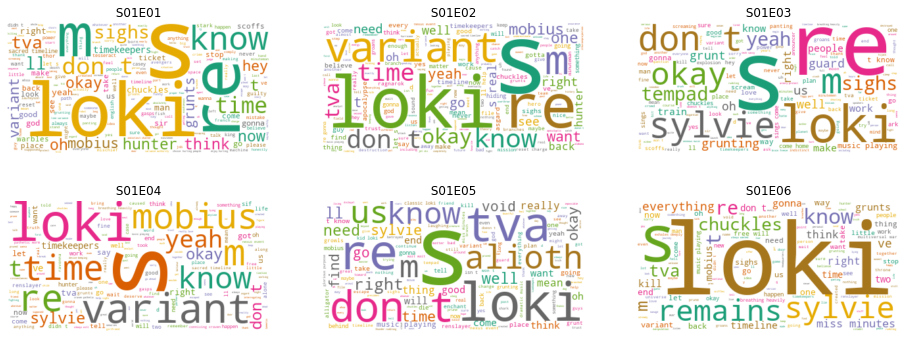

In [36]:
#reset the output dimensions

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16,6]

#create subplots for each episode
for index, episode in enumerate(data.columns):
    wc.generate(data_clean.transcript[episode])
    
    plt.subplot(2, 3, index+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(episode)

plt.show()

Findings:

    *As the series name suggest, Loki is definitely the central character.
    *Mobius, sylvie ,alioth are some more characters
    *This is something related to time, variant, tva.

We could have added some more words to our stopwords list such as re, m, S etc

### Numbers of words

In [48]:
# find the number of unique words used in each episodes

# identify the non-zero items in the document-term matrix
unique_list = []
for episode in data.columns:
    uniques = data[episode].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

#creating a dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(data.columns, unique_list)), columns=['episode','unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,episode,unique_words
5,S01E06,684
2,S01E03,733
3,S01E04,736
4,S01E05,772
0,S01E01,916
1,S01E02,1120


In [51]:
#calculating the words per minute in each episode

# find the total number of words that are used in a episode

total_list=[]
for episode in data.columns:
    totals = sum(data[episode])
    total_list.append(totals)

#episodes run time from imdb
run_time = [51, 53, 42, 48, 48, 45]

#let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_time
data_words['words_per_minute'] = data_words['total_words']/data_words['run_times']

data_words

,episode,unique_words,total_words,run_times,words_per_minute
0,S01E01,916,1927,51,37.784314
1,S01E02,1120,2419,53,45.641509
2,S01E03,733,1617,42,38.500000
3,S01E04,736,1583,48,32.979167
4,S01E05,772,1612,48,33.583333
5,S01E06,684,1498,45,33.288889


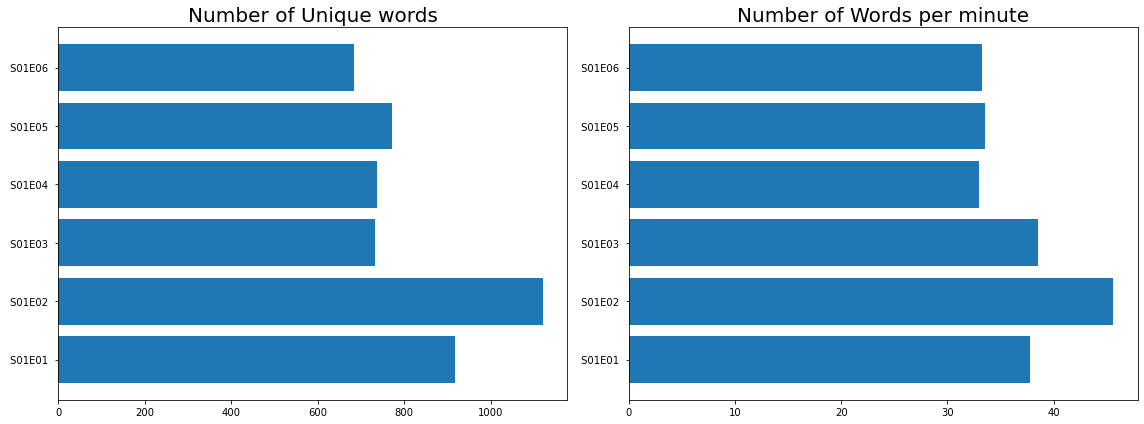

In [53]:
#let's plot our findings

import numpy as np
y_pos = np.arange(len(data_words))

plt.subplot(1,2,1)
plt.barh(y_pos, data_words.unique_words, align='center')
plt.yticks(y_pos, data_words.episode)
plt.title('Number of Unique words', fontsize=20)


plt.subplot(1,2,2)
plt.barh(y_pos, data_words.words_per_minute, align='center')
plt.yticks(y_pos, data_words.episode)
plt.title('Number of Words per minute', fontsize=20)

plt.tight_layout()
plt.show()

We can concur that more words are used in the starting episodes to introduce different characters and take some time to build up the plot, followed by almost equal and lesser words used for the later episode since now the director have to just focus on the end without wasting to much time on the nitty gritties.

In [54]:
### Amount of Profanity

In [55]:
Counter(words).most_common()

[('loki', 6),
 ('don', 6),
 ('know', 6),
 ('just', 6),
 ('like', 6),
 ('oh', 6),
 ('right', 6),
 ('time', 5),
 ('tva', 5),
 ('okay', 5),
 ('yeah', 5),
 ('sighs', 4),
 ('ll', 4),
 ('timeline', 4),
 ('mobius', 4),
 ('chuckles', 4),
 ('gonna', 4),
 ('good', 4),
 ('let', 4),
 ('come', 4),
 ('sylvie', 4),
 ('think', 3),
 ('hunter', 3),
 ('timekeepers', 3),
 ('grunts', 3),
 ('variant', 3),
 ('want', 3),
 ('need', 3),
 ('ve', 3),
 ('did', 3),
 ('music', 3),
 ('man', 2),
 ('people', 2),
 ('playing', 2),
 ('way', 2),
 ('love', 2),
 ('really', 2),
 ('end', 2),
 ('hey', 1),
 ('sir', 1),
 ('sacred', 1),
 ('scoffs', 1),
 ('real', 1),
 ('yes', 1),
 ('asgard', 1),
 ('gotta', 1),
 ('grunting', 1),
 ('tempad', 1),
 ('sings', 1),
 ('guard', 1),
 ('train', 1),
 ('sure', 1),
 ('got', 1),
 ('say', 1),
 ('sif', 1),
 ('tell', 1),
 ('variants', 1),
 ('alioth', 1),
 ('void', 1),
 ('thing', 1),
 ('place', 1),
 ('mean', 1),
 ('going', 1),
 ('wait', 1),
 ('remains', 1),
 ('miss', 1),
 ('minutes', 1),
 ('kill', 1)

In [64]:
data.transpose()[['shit','piss','damn','ass','hell']]

,shit,piss,damn,ass,hell
Episode,,,,,
S01E01,0,0,1,0,2
S01E02,1,0,2,0,2
S01E03,1,1,1,1,1
S01E04,0,0,0,1,2
S01E05,0,1,1,0,3
S01E06,0,0,0,0,4


In [68]:
data_bad_words=data.transpose()[['shit','piss','damn','ass','hell']]
data_profanity = pd.concat([data_bad_words.shit+data_bad_words.piss+
                           data_bad_words.ass,data_bad_words.damn+
                           data_bad_words.hell], axis=1)
data_profanity.columns = ['Intense_words', 'Mild_words']
data_profanity

,Intense_words,Mild_words
Episode,,
S01E01,0,3
S01E02,1,4
S01E03,3,2
S01E04,1,2
S01E05,1,4
S01E06,0,4


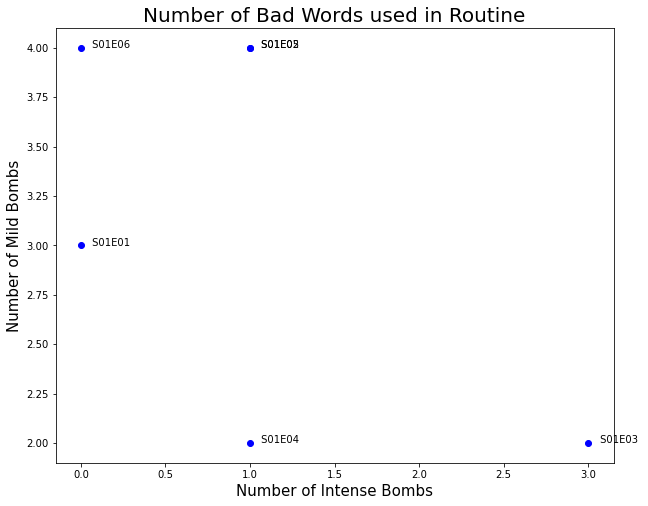

In [79]:
#let's create a scatter plot of our finding

plt.rcParams['figure.figsize'] = [10,8]

for i, episode in enumerate(data_profanity.index):
    x = data_profanity.Intense_words.loc[episode]
    y = data_profanity.Mild_words.loc[episode]
    plt.scatter(x, y, color='blue')
    plt.text(x+0.05, y, data_profanity.index[i], fontsize=10)
    #plt.xlim(-5, 155)

plt.title('Number of Bad Words used in Routine', fontsize=20)
plt.xlabel('Number of Intense Bombs', fontsize=15)
plt.ylabel('Number of Mild Bombs', fontsize=15)

plt.show()

So yeah, the above TV series is for a majority audience, being not much focused on profanity and more on the plot.

## Sentiment Ananlysis

    *TextBlob Module
    *Sentiment labels

    --Polarity : How positive or negatuve a word is
    --Subjectivity : How subjective, or opinionated a  word is.0 is fact +1 is very much an opinion

In [84]:
#sentiment of routine
#we ll start with the corpus since it preserves word order 

import pandas as pd
data = pd.read_pickle('corpus.pkl')
data.head()
data.index = data['Episode']

In [85]:
#!pip install textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.polarity

data['Polarity'] = data['transcript'].apply(pol)
data['Subjectivity'] = data['transcript'].apply(sub)
data

,transcript,Episode,Name,Polarity,Subjectivity
Episode,,,,,
S01E01,"Original release date : June 9, 2021 In the Gobi Desert, Mongolia, an alternative timeline version of Loki is captured by the Time Variance Author...",S01E01,G l o r i o u s P u r p o s e,0.061260,0.061260
S01E02,"Original release date : June 16, 2021 Loki joins a TVA mission following an ambush by the fugitive Variant of Loki in 1985 Oshkosh, Wisconsin. He ...",S01E02,T h e V a r i a n t,0.120275,0.120275
S01E03,"Original release date : June 23, 2021 Loki follows the Variant, whose name is Sylvie, to the TVA, where they are confronted by Renslayer, before e...",S01E03,L a m e n t i s,0.124489,0.124489
S01E04,"Original release date : June 30, 2021 On Lamentis-1, Sylvie tells Loki she escaped the TVA’s detention as a child. In the present, Renslayer infor...",S01E04,T h e N e x u s E v e n t,0.099569,0.099569
S01E05,"Original release date : July 7, 2021 Sylvie learns from Renslayer that Loki was teleported to the Void, a dimension at the end of Time where every...",S01E05,J o u r n e y i n t o M y s t e r y,0.080448,0.080448


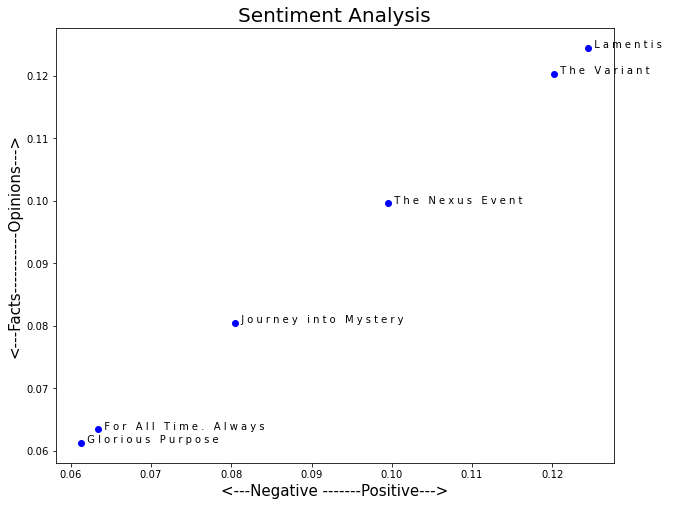

In [88]:
#let's plot the results

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10,8]

for index, episode in enumerate(data.index):
    x = data.Polarity.loc[episode]
    y = data.Subjectivity.loc[episode]
    
    plt.scatter(x, y, color='blue')
    plt.text(x+0.00001, y, data['Name'][index], fontsize=10)

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<---Negative -------Positive--->', fontsize=15)
plt.ylabel('<---Facts-----------Opinions--->', fontsize=15)

plt.show()

In [89]:
# Sentiment routine over time
'''Instead of looking at the overall sentiment let's look at these sentiments
over time'''


#splitting routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    length = len(text) #length of text
    print(length)
    size = math.floor(length/n) #size of each chunk of text
    print(size)
    start = np.arange(0, length, size)
    print(start)
    
    #pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [90]:
data

,transcript,Episode,Name,Polarity,Subjectivity
Episode,,,,,
S01E01,"Original release date : June 9, 2021 In the Gobi Desert, Mongolia, an alternative timeline version of Loki is captured by the Time Variance Author...",S01E01,G l o r i o u s P u r p o s e,0.061260,0.061260
S01E02,"Original release date : June 16, 2021 Loki joins a TVA mission following an ambush by the fugitive Variant of Loki in 1985 Oshkosh, Wisconsin. He ...",S01E02,T h e V a r i a n t,0.120275,0.120275
S01E03,"Original release date : June 23, 2021 Loki follows the Variant, whose name is Sylvie, to the TVA, where they are confronted by Renslayer, before e...",S01E03,L a m e n t i s,0.124489,0.124489
S01E04,"Original release date : June 30, 2021 On Lamentis-1, Sylvie tells Loki she escaped the TVA’s detention as a child. In the present, Renslayer infor...",S01E04,T h e N e x u s E v e n t,0.099569,0.099569
S01E05,"Original release date : July 7, 2021 Sylvie learns from Renslayer that Loki was teleported to the Void, a dimension at the end of Time where every...",S01E05,J o u r n e y i n t o M y s t e r y,0.080448,0.080448
S01E06,"Original release date : July 14, 2021 In the Citadel at the End of Time, Loki and Sylvie meet Miss Minutes, rejecting an offer from her master, “H...",S01E06,F o r A l l T i m e . A l w a y s,0.063436,0.063436


In [91]:
#creating a list to hold text pieces

list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)

list_pieces

23119
2311
[    0  2311  4622  6933  9244 11555 13866 16177 18488 20799 23110]
30326
3032
[    0  3032  6064  9096 12128 15160 18192 21224 24256 27288 30320]
19262
1926
[    0  1926  3852  5778  7704  9630 11556 13482 15408 17334 19260]
20555
2055
[    0  2055  4110  6165  8220 10275 12330 14385 16440 18495 20550]
20297
2029
[    0  2029  4058  6087  8116 10145 12174 14203 16232 18261 20290]
18582
1858
[    0  1858  3716  5574  7432  9290 11148 13006 14864 16722 18580]


[['Original release date\u200a: June 9, 2021 In the Gobi Desert, Mongolia, an alternative timeline version of Loki is captured by the Time Variance Authority (TVA) after escaping from the Battle of New York with the Tesseract in 2012. In the TVA’s headquarters, Judge Ravonna Renslayer accuses him of crimes against the Sacred Timeline. Loki believes the TVA should suspect the Avengers, as they went back in time, causing him to end up in this situation. However, Renslayer counters this by saying the Avengers’ mission was meant to happen, but Loki’s escape was not. Following this, Agent Mobius M. Mobius takes Loki to the Time Theatre to review Loki’s past misdeeds and question his habit of killing and hurting people. Loki steals TVA tech to retrieve the Tesseract, but gives up escaping upon realizing that the TVA’s power exceeds his and that of the Infinity Stones. Loki returns to the Time Theatre and witnesses a recording of his soon-would be future of his adoptive parents, Frigga and Od

In [92]:
len(list_pieces)

6

In [93]:
len(list_pieces[0])

10

In [94]:
# calculating polarity

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

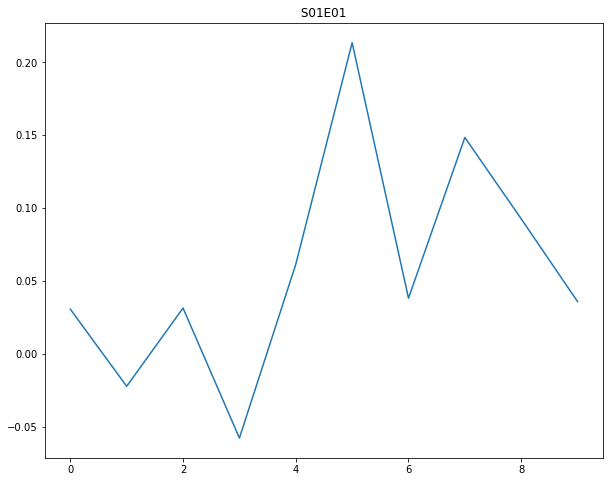

In [95]:
#show the plot for one episode
plt.plot(polarity_transcript[0])
plt.title(data['Name'].index[0])
plt.show()

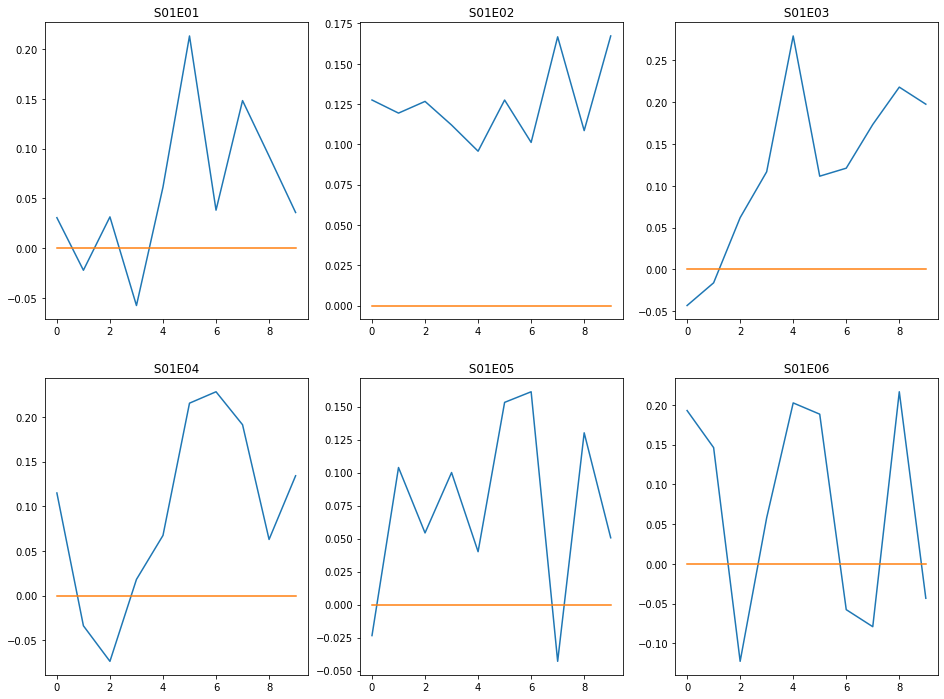

In [97]:
#showing the plot for all episodes

plt.rcParams['figure.figsize'] = [16,12]

for index, episode in enumerate(data.index):
    plt.subplot(2,3, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10)) #straight line at '0'
    plt.title(data['Episode'][index])
    
plt.show()

So we can see episodes 2, 3 and 5 are fairly positive in comparison.

## Topic Modelling

Topic modelling is recognizing the words from the topics present in the document or the corpus of data. This is useful because extracting the words from a document takes more time and is much more complex than extracting them from topics present in the document. For example, there are 1000 documents and 500 words in each document. So to process this it requires 500*1000 = 500000 threads. So when you divide the document containing certain topics then if there are 5 topics present in it, the processing is just 5*500 words = 2500 threads.

This looks simple than processing the entire document and this is how topic modelling has come up to solve the problem and also visualizing things better.

In [98]:
#our Document-term matrix
data_dtm

,abandoned,able,aboard,absolutely,absurd,accept,accepted,access,accidentally,accomplished,...,yelling,yells,yelps,yep,yes,yipping,yo,york,young,zero
Episode,,,,,,,,,,,,,,,,,,,,,
S01E01,0,0,0,3,3,0,0,0,0,0,...,0,0,0,1,5,0,1,1,1,0
S01E02,0,1,0,1,1,1,0,0,0,0,...,0,0,1,0,13,1,0,0,0,1
S01E03,1,2,1,1,0,0,1,0,1,0,...,0,0,0,1,8,0,0,0,2,0
S01E04,0,0,0,2,0,0,0,2,0,2,...,1,0,0,1,4,0,0,0,0,0
S01E05,0,1,0,1,0,1,0,1,0,0,...,2,1,0,0,6,0,0,1,0,0
S01E06,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,4,0,0,1,1,0


In [99]:
#doing LDA(Latent Dirichket Allocation) by Gensim

from gensim import matutils, models
import scipy.sparse #SciPy 2-D sparse matrix package for numerical data

C:\Users\lenovo\anaconda31\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [100]:
#one of the input is a term-documnet matrix
tdm = data_dtm.transpose()
tdm

Episode,S01E01,S01E02,S01E03,S01E04,S01E05,S01E06
abandoned,0,0,1,0,0,0
able,0,1,2,0,1,1
aboard,0,0,1,0,0,0
absolutely,3,1,1,2,1,0
absurd,3,1,0,0,0,0
...,...,...,...,...,...,...
yipping,0,1,0,0,0,0
yo,1,0,0,0,0,0
york,1,0,0,0,1,1
young,1,0,2,0,0,1


In [105]:
#term-documnet matrix to gensim format df-->sparse matrix-->gensim corpus

sparse_counts = scipy.sparse.csr_matrix(tdm)
#print(sparse_counts)
corpus = matutils.Sparse2Corpus(sparse_counts)
print(list(corpus))

[[(3, 3), (4, 3), (10, 2), (11, 1), (12, 1), (13, 1), (15, 1), (17, 1), (19, 4), (21, 1), (26, 1), (29, 1), (30, 1), (33, 2), (34, 3), (37, 1), (38, 1), (40, 2), (42, 1), (43, 2), (53, 1), (54, 1), (55, 1), (57, 1), (59, 1), (63, 1), (73, 1), (89, 1), (100, 2), (101, 1), (103, 1), (104, 2), (106, 1), (107, 1), (112, 1), (115, 1), (118, 1), (121, 1), (122, 2), (123, 3), (124, 1), (126, 1), (127, 1), (128, 1), (138, 2), (140, 1), (142, 2), (146, 2), (147, 4), (148, 1), (149, 1), (150, 5), (153, 2), (155, 1), (163, 3), (166, 1), (168, 1), (172, 1), (174, 1), (179, 1), (180, 1), (183, 2), (190, 3), (191, 2), (192, 2), (197, 1), (199, 1), (202, 4), (204, 2), (207, 1), (209, 1), (212, 1), (213, 1), (214, 1), (218, 2), (219, 4), (241, 1), (244, 1), (245, 1), (248, 1), (250, 1), (253, 1), (257, 5), (262, 1), (263, 1), (268, 3), (277, 2), (278, 2), (280, 1), (281, 2), (282, 1), (286, 1), (289, 1), (293, 2), (296, 1), (297, 1), (300, 1), (301, 1), (302, 1), (304, 1), (306, 2), (310, 1), (312, 1)

In [107]:
#gensim also requires dict of all the terms an dtheir respective location in the document-term matrix

id2word = dict((v,k) for k, v in cv.vocabulary_.items())
id2word

{1626: 'original',
 1883: 'release',
 579: 'date',
 1276: 'june',
 1002: 'gobi',
 621: 'desert',
 1517: 'mongolia',
 63: 'alternative',
 2414: 'timeline',
 2554: 'version',
 1393: 'loki',
 329: 'captured',
 2411: 'time',
 2544: 'variance',
 147: 'authority',
 2482: 'tva',
 786: 'escaping',
 179: 'battle',
 1568: 'new',
 2697: 'york',
 2371: 'tesseract',
 1084: 'headquarters',
 1270: 'judge',
 1843: 'ravonna',
 1896: 'renslayer',
 12: 'accuses',
 549: 'crimes',
 1966: 'sacred',
 204: 'believes',
 2318: 'suspect',
 150: 'avengers',
 2619: 'went',
 355: 'causing',
 759: 'end',
 2107: 'situation',
 519: 'counters',
 1987: 'saying',
 1501: 'mission',
 1463: 'meant',
 1065: 'happen',
 783: 'escape',
 915: 'following',
 34: 'agent',
 1511: 'mobius',
 2336: 'takes',
 2379: 'theatre',
 1923: 'review',
 1674: 'past',
 1497: 'misdeeds',
 1822: 'question',
 1056: 'habit',
 1293: 'killing',
 1170: 'hurting',
 1684: 'people',
 2231: 'steals',
 2352: 'tech',
 1916: 'retrieve',
 995: 'gives',
 1855: '

No we have the corpus(term-documnet matrix) and id2word(dict of location), we need to specify two other parameters- the number of topics and the the number of passes

In [109]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.023*"loki" + 0.011*"just" + 0.011*"know" + 0.010*"sylvie" + 0.010*"tva" + 0.010*"don" + 0.009*"time" + 0.008*"mobius" + 0.008*"variant" + 0.007*"okay"'),
 (1,
  '0.013*"loki" + 0.009*"don" + 0.009*"know" + 0.009*"just" + 0.008*"sighs" + 0.007*"okay" + 0.006*"time" + 0.006*"oh" + 0.006*"yeah" + 0.006*"like"')]

In [110]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.025*"loki" + 0.012*"sylvie" + 0.012*"remains" + 0.012*"just" + 0.011*"know" + 0.009*"don" + 0.009*"tva" + 0.009*"variant" + 0.009*"mobius" + 0.009*"time"'),
 (1,
  '0.001*"loki" + 0.001*"don" + 0.001*"tva" + 0.001*"know" + 0.001*"sylvie" + 0.001*"just" + 0.001*"okay" + 0.001*"right" + 0.001*"time" + 0.001*"like"'),
 (2,
  '0.019*"loki" + 0.012*"don" + 0.011*"know" + 0.011*"just" + 0.010*"sylvie" + 0.010*"tva" + 0.008*"okay" + 0.007*"right" + 0.007*"oh" + 0.007*"yeah"'),
 (3,
  '0.017*"loki" + 0.011*"time" + 0.010*"just" + 0.010*"know" + 0.009*"don" + 0.008*"mobius" + 0.008*"variant" + 0.007*"tva" + 0.007*"yeah" + 0.007*"okay"')]

In [111]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=10, passes=10)
lda.print_topics()

[(0,
  '0.001*"loki" + 0.001*"know" + 0.001*"just" + 0.001*"sylvie" + 0.001*"don" + 0.001*"right" + 0.001*"tva" + 0.001*"mobius" + 0.001*"oh" + 0.001*"okay"'),
 (1,
  '0.001*"loki" + 0.001*"know" + 0.001*"don" + 0.001*"just" + 0.000*"tva" + 0.000*"time" + 0.000*"variant" + 0.000*"okay" + 0.000*"right" + 0.000*"mobius"'),
 (2,
  '0.001*"loki" + 0.001*"just" + 0.001*"sylvie" + 0.001*"don" + 0.001*"know" + 0.001*"sighs" + 0.001*"okay" + 0.001*"time" + 0.001*"variant" + 0.001*"like"'),
 (3,
  '0.001*"loki" + 0.001*"just" + 0.001*"know" + 0.001*"tva" + 0.001*"sylvie" + 0.001*"don" + 0.000*"okay" + 0.000*"oh" + 0.000*"time" + 0.000*"ll"'),
 (4,
  '0.002*"loki" + 0.001*"don" + 0.001*"just" + 0.001*"know" + 0.001*"okay" + 0.001*"yeah" + 0.001*"tva" + 0.001*"come" + 0.001*"oh" + 0.001*"sylvie"'),
 (5,
  '0.001*"loki" + 0.001*"just" + 0.001*"okay" + 0.001*"know" + 0.001*"yeah" + 0.001*"time" + 0.001*"sylvie" + 0.001*"don" + 0.001*"mobius" + 0.001*"variant"'),
 (6,
  '0.025*"loki" + 0.013*"just" 

Not tHAT GREAT, right!!

## Topic Modelling - Attempt #2(Noun Only)

Looking at terms that are from one part of speech i.e only nouns, only adjectives:

https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [113]:
#let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    is_noun = lambda pos:pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    #print(pos_tag(tokenized))
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)]
    return ' '.join(all_nouns)

In [114]:
data_clean = pd.read_pickle('data_clean.pkl')
data_clean

,transcript
Episode,
S01E01,original release date june in the gobi desert mongolia an alternative timeline version of loki is captured by the time variance authority tva a...
S01E02,original release date june loki joins a tva mission following an ambush by the fugitive variant of loki in oshkosh wisconsin he wants assuranc...
S01E03,original release date june loki follows the variant whose name is sylvie to the tva where they are confronted by renslayer before escaping usin...
S01E04,original release date june on sylvie tells loki she escaped the tva’s detention as a child in the present renslayer informs mobius about hunte...
S01E05,original release date july sylvie learns from renslayer that loki was teleported to the void a dimension at the end of time where everything th...
S01E06,original release date july in the citadel at the end of time loki and sylvie meet miss minutes rejecting an offer from her master “he who remai...


In [117]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [118]:
data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns))

[('original', 'JJ'), ('release', 'NN'), ('date', 'NN'), ('june', 'NN'), ('in', 'IN'), ('the', 'DT'), ('gobi', 'NN'), ('desert', 'NN'), ('mongolia', 'VBD'), ('an', 'DT'), ('alternative', 'JJ'), ('timeline', 'JJ'), ('version', 'NN'), ('of', 'IN'), ('loki', 'NN'), ('is', 'VBZ'), ('captured', 'VBN'), ('by', 'IN'), ('the', 'DT'), ('time', 'NN'), ('variance', 'NN'), ('authority', 'NN'), ('tva', 'NN'), ('after', 'IN'), ('escaping', 'VBG'), ('from', 'IN'), ('the', 'DT'), ('battle', 'NN'), ('of', 'IN'), ('new', 'JJ'), ('york', 'NN'), ('with', 'IN'), ('the', 'DT'), ('tesseract', 'NN'), ('in', 'IN'), ('in', 'IN'), ('the', 'DT'), ('tva', 'NN'), ('’', 'NNP'), ('s', 'NN'), ('headquarters', 'NNS'), ('judge', 'VBP'), ('ravonna', 'NN'), ('renslayer', 'NN'), ('accuses', 'VBZ'), ('him', 'PRP'), ('of', 'IN'), ('crimes', 'NNS'), ('against', 'IN'), ('the', 'DT'), ('sacred', 'JJ'), ('timeline', 'NN'), ('loki', 'NN'), ('believes', 'VBZ'), ('the', 'DT'), ('tva', 'NN'), ('should', 'MD'), ('suspect', 'VB'), ('th

[('original', 'JJ'), ('release', 'NN'), ('date', 'NN'), ('june', 'NN'), ('loki', 'NN'), ('joins', 'VBZ'), ('a', 'DT'), ('tva', 'JJ'), ('mission', 'NN'), ('following', 'VBG'), ('an', 'DT'), ('ambush', 'NN'), ('by', 'IN'), ('the', 'DT'), ('fugitive', 'JJ'), ('variant', 'NN'), ('of', 'IN'), ('loki', 'NN'), ('in', 'IN'), ('oshkosh', 'JJ'), ('wisconsin', 'NN'), ('he', 'PRP'), ('wants', 'VBZ'), ('assurance', 'NN'), ('that', 'IN'), ('the', 'DT'), ('tva', 'NN'), ('will', 'MD'), ('let', 'VB'), ('him', 'PRP'), ('meet', 'VB'), ('the', 'DT'), ('time', 'NN'), ('keepers', 'NNS'), ('instead', 'RB'), ('of', 'IN'), ('disintegrating', 'VBG'), ('him', 'PRP'), ('but', 'CC'), ('mobius', 'NN'), ('figures', 'NNS'), ('out', 'RP'), ('that', 'IN'), ('he', 'PRP'), ('is', 'VBZ'), ('stalling', 'VBG'), ('back', 'RB'), ('at', 'IN'), ('the', 'DT'), ('tva', 'NN'), ('headquarters', 'NN'), ('mobius', 'NN'), ('convinces', 'NNS'), ('renslayer', 'VBP'), ('to', 'TO'), ('give', 'VB'), ('loki', 'NN'), ('another', 'DT'), ('cha

[('original', 'JJ'), ('release', 'NN'), ('date', 'NN'), ('june', 'NN'), ('loki', 'NN'), ('follows', 'VBZ'), ('the', 'DT'), ('variant', 'NN'), ('whose', 'WP$'), ('name', 'NN'), ('is', 'VBZ'), ('sylvie', 'VBN'), ('to', 'TO'), ('the', 'DT'), ('tva', 'NN'), ('where', 'WRB'), ('they', 'PRP'), ('are', 'VBP'), ('confronted', 'VBN'), ('by', 'IN'), ('renslayer', 'NN'), ('before', 'IN'), ('escaping', 'VBG'), ('using', 'VBG'), ('a', 'DT'), ('tempad', 'NN'), ('to', 'TO'), ('a', 'DT'), ('moon', 'NN'), ('that', 'WDT'), ('is', 'VBZ'), ('soon', 'RB'), ('to', 'TO'), ('be', 'VB'), ('crushed', 'VBN'), ('by', 'IN'), ('a', 'DT'), ('planet', 'NN'), ('both', 'DT'), ('are', 'VBP'), ('unable', 'JJ'), ('to', 'TO'), ('escape', 'VB'), ('due', 'JJ'), ('to', 'TO'), ('the', 'DT'), ('tempad', 'NN'), ('having', 'VBG'), ('run', 'VBN'), ('out', 'IN'), ('of', 'IN'), ('power', 'NN'), ('the', 'DT'), ('two', 'CD'), ('sneak', 'VBP'), ('aboard', 'IN'), ('a', 'DT'), ('train', 'NN'), ('bound', 'NN'), ('for', 'IN'), ('the', 'DT'

[('original', 'JJ'), ('release', 'NN'), ('date', 'NN'), ('june', 'NN'), ('on', 'IN'), ('sylvie', 'NN'), ('tells', 'NNS'), ('loki', 'VBZ'), ('she', 'PRP'), ('escaped', 'VBD'), ('the', 'DT'), ('tva', 'NN'), ('’', 'NNP'), ('s', 'VBZ'), ('detention', 'NN'), ('as', 'IN'), ('a', 'DT'), ('child', 'NN'), ('in', 'IN'), ('the', 'DT'), ('present', 'JJ'), ('renslayer', 'NN'), ('informs', 'NNS'), ('mobius', 'VBP'), ('about', 'IN'), ('hunter', 'NN'), ('’', 'NNP'), ('s', 'VBZ'), ('death', 'NN'), ('in', 'IN'), ('uncertain', 'JJ'), ('circumstances', 'NNS'), ('loki', 'NN'), ('and', 'CC'), ('sylvie', 'JJ'), ('form', 'NN'), ('a', 'DT'), ('romantic', 'JJ'), ('bond', 'NN'), ('creating', 'VBG'), ('a', 'DT'), ('unique', 'JJ'), ('branched', 'JJ'), ('timeline', 'NN'), ('mobius', 'NN'), ('has', 'VBZ'), ('them', 'PRP'), ('both', 'DT'), ('arrested', 'VBD'), ('punishing', 'VBG'), ('loki', 'NN'), ('by', 'IN'), ('leaving', 'VBG'), ('him', 'PRP'), ('in', 'IN'), ('a', 'DT'), ('time', 'NN'), ('loop', 'NN'), ('with', 'IN

[('original', 'JJ'), ('release', 'NN'), ('date', 'NN'), ('july', 'NN'), ('sylvie', 'JJ'), ('learns', 'NNS'), ('from', 'IN'), ('renslayer', 'NN'), ('that', 'IN'), ('loki', 'NN'), ('was', 'VBD'), ('teleported', 'VBN'), ('to', 'TO'), ('the', 'DT'), ('void', 'NN'), ('a', 'DT'), ('dimension', 'NN'), ('at', 'IN'), ('the', 'DT'), ('end', 'NN'), ('of', 'IN'), ('time', 'NN'), ('where', 'WRB'), ('everything', 'NN'), ('the', 'DT'), ('tva', 'NN'), ('prunes', 'NNS'), ('is', 'VBZ'), ('dumped', 'VBN'), ('into', 'IN'), ('meanwhile', 'RB'), ('the', 'DT'), ('other', 'JJ'), ('variants', 'NNS'), ('tell', 'VBP'), ('loki', 'VBZ'), ('that', 'IN'), ('a', 'DT'), ('cloudlike', 'JJ'), ('creature', 'NN'), ('named', 'VBN'), ('alioth', 'DT'), ('guards', 'NNS'), ('the', 'DT'), ('void', 'NN'), ('and', 'CC'), ('prevents', 'NNS'), ('anyone', 'NN'), ('from', 'IN'), ('escaping', 'VBG'), ('in', 'IN'), ('an', 'DT'), ('attempt', 'NN'), ('to', 'TO'), ('reach', 'VB'), ('loki', 'JJ'), ('sylvie', 'NN'), ('prunes', 'NNS'), ('her

[('original', 'JJ'), ('release', 'NN'), ('date', 'NN'), ('july', 'NN'), ('in', 'IN'), ('the', 'DT'), ('citadel', 'NN'), ('at', 'IN'), ('the', 'DT'), ('end', 'NN'), ('of', 'IN'), ('time', 'NN'), ('loki', 'NN'), ('and', 'CC'), ('sylvie', 'JJ'), ('meet', 'NN'), ('miss', 'JJ'), ('minutes', 'NNS'), ('rejecting', 'VBG'), ('an', 'DT'), ('offer', 'NN'), ('from', 'IN'), ('her', 'PRP$'), ('master', 'NN'), ('“', 'NN'), ('he', 'PRP'), ('who', 'WP'), ('remains', 'VBZ'), ('”', 'VBP'), ('to', 'TO'), ('return', 'VB'), ('them', 'PRP'), ('to', 'TO'), ('the', 'DT'), ('timeline', 'NN'), ('while', 'IN'), ('guaranteeing', 'VBG'), ('them', 'PRP'), ('rulership', 'NN'), ('and', 'CC'), ('happiness', 'NN'), ('meanwhile', 'RB'), ('renslayer', 'NN'), ('leaves', 'VBZ'), ('on', 'IN'), ('a', 'DT'), ('mission', 'NN'), ('to', 'TO'), ('find', 'VB'), ('“', 'JJ'), ('free', 'JJ'), ('will', 'MD'), ('”', 'VB'), ('after', 'IN'), ('receiving', 'VBG'), ('information', 'NN'), ('from', 'IN'), ('he', 'PRP'), ('who', 'WP'), ('remai

In [120]:
data_nouns

,transcript
Episode,
S01E01,release date june gobi desert version loki time variance authority tva battle york tesseract tva ’ s headquarters ravonna renslayer crimes timelin...
S01E02,release date june loki mission ambush variant loki wisconsin assurance tva time keepers mobius figures tva headquarters mobius convinces loki chan...
S01E03,release date june loki variant name tva renslayer tempad moon planet tempad power train bound ark spaceship order power tempad train drunk guards ...
S01E04,release date june sylvie tells tva ’ detention child renslayer informs hunter ’ death circumstances loki form bond timeline mobius loki time loop ...
S01E05,release date july learns renslayer loki void dimension end time everything tva prunes variants creature guards void prevents anyone attempt sylvie...
S01E06,release date july citadel end time loki meet minutes offer master “ timeline rulership happiness renslayer mission information greets revealing tv...


In [138]:
#create a new document-term matrix using only nouns

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

#adding stopwords
add_stop_Words = list(set(['re', 'm','S','dont']+add_stopwords))
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_Words)

#recareate a  document-term matrix with only nouns

cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

,access,accusation,acquaintance,action,actions,ad,address,adjustments,admit,advantage,...,wounds,wow,wrong,ya,years,yells,yep,yes,yo,york
Episode,,,,,,,,,,,,,,,,,,,,,
S01E01,0,1,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,3,1,1
S01E02,0,0,0,0,1,1,1,0,0,0,...,1,0,1,1,0,0,0,3,0,0
S01E03,0,0,1,0,0,0,1,0,0,2,...,0,0,0,0,4,0,1,4,0,0
S01E04,2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
S01E05,1,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
S01E06,0,0,0,0,0,0,1,1,0,0,...,0,1,0,0,1,0,0,1,0,1


In [142]:
#create the gensim corpus

sparse_counts = scipy.sparse.csr_matrix(data_dtmn.transpose())
corpusn = matutils.Sparse2Corpus(sparse_counts)
#print(list(corpusn))

#create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())
id2wordn

{958: 'release',
 304: 'date',
 649: 'june',
 508: 'gobi',
 320: 'desert',
 1315: 'version',
 714: 'loki',
 1247: 'time',
 1309: 'variance',
 82: 'authority',
 1287: 'tva',
 100: 'battle',
 1385: 'york',
 1219: 'tesseract',
 551: 'headquarters',
 942: 'ravonna',
 961: 'renslayer',
 285: 'crimes',
 1250: 'timeline',
 83: 'avengers',
 1070: 'situation',
 271: 'counters',
 782: 'mission',
 399: 'escape',
 787: 'mobius',
 1226: 'theatre',
 862: 'past',
 779: 'misdeeds',
 933: 'question',
 539: 'habit',
 868: 'people',
 1143: 'steals',
 1208: 'tech',
 904: 'power',
 611: 'infinity',
 1151: 'stones',
 970: 'returns',
 952: 'recording',
 1100: 'soonwould',
 492: 'future',
 856: 'parents',
 485: 'frigga',
 309: 'deaths',
 541: 'hand',
 291: 'cruelty',
 778: 'mischief',
 64: 'ascendance',
 984: 'rogue',
 1310: 'variant',
 1342: 'way',
 1025: 'search',
 964: 'rescue',
 469: 'food',
 1352: 'whoa',
 565: 'hey',
 824: 'occupancy',
 526: 'growls',
 1232: 'thor',
 1130: 'stairs',
 1152: 'stop',
 723:

In [144]:
#let's start with two topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn,passes=10)
ldan.print_topics()

[(0,
  '0.026*"loki" + 0.020*"time" + 0.016*"tva" + 0.014*"variant" + 0.014*"mobius" + 0.012*"timeline" + 0.011*"sylvie" + 0.011*"timekeepers" + 0.008*"chuckles" + 0.007*"grunts"'),
 (1,
  '0.021*"loki" + 0.019*"tva" + 0.015*"time" + 0.010*"grunts" + 0.009*"music" + 0.009*"place" + 0.008*"people" + 0.008*"man" + 0.007*"timeline" + 0.007*"timekeepers"')]

In [145]:
#topics=4
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn,passes=10)
ldan.print_topics()

[(0,
  '0.001*"time" + 0.001*"loki" + 0.001*"tva" + 0.001*"variant" + 0.001*"timeline" + 0.001*"mobius" + 0.001*"timekeepers" + 0.001*"grunts" + 0.001*"music" + 0.001*"sylvie"'),
 (1,
  '0.016*"loki" + 0.014*"grunts" + 0.014*"tempad" + 0.011*"people" + 0.011*"sylvie" + 0.011*"music" + 0.010*"way" + 0.010*"train" + 0.009*"man" + 0.009*"sighs"'),
 (2,
  '0.026*"loki" + 0.022*"time" + 0.017*"tva" + 0.013*"sylvie" + 0.013*"timeline" + 0.012*"timekeepers" + 0.012*"mobius" + 0.010*"grunts" + 0.009*"variant" + 0.008*"chuckles"'),
 (3,
  '0.028*"loki" + 0.026*"tva" + 0.021*"time" + 0.015*"variant" + 0.010*"mobius" + 0.010*"music" + 0.010*"timeline" + 0.009*"gon" + 0.009*"thing" + 0.008*"timekeepers"')]

In [146]:
#topics=6
ldan = models.LdaModel(corpus=corpusn, num_topics=6, id2word=id2wordn,passes=10)
ldan.print_topics()

[(0,
  '0.001*"time" + 0.001*"loki" + 0.001*"timeline" + 0.001*"mobius" + 0.001*"tva" + 0.001*"chuckles" + 0.001*"variant" + 0.001*"grunts" + 0.001*"timekeepers" + 0.001*"people"'),
 (1,
  '0.001*"loki" + 0.001*"time" + 0.001*"tva" + 0.001*"sylvie" + 0.001*"variant" + 0.001*"grunts" + 0.001*"mobius" + 0.001*"timeline" + 0.001*"music" + 0.001*"minutes"'),
 (2,
  '0.029*"loki" + 0.022*"time" + 0.022*"tva" + 0.012*"timeline" + 0.012*"variant" + 0.011*"sylvie" + 0.011*"timekeepers" + 0.011*"mobius" + 0.011*"grunts" + 0.009*"music"'),
 (3,
  '0.001*"loki" + 0.001*"time" + 0.001*"tva" + 0.001*"variant" + 0.001*"timekeepers" + 0.001*"mobius" + 0.001*"timeline" + 0.001*"grunts" + 0.001*"chuckles" + 0.001*"music"'),
 (4,
  '0.001*"time" + 0.001*"loki" + 0.001*"tva" + 0.001*"grunts" + 0.001*"timeline" + 0.001*"timekeepers" + 0.001*"music" + 0.001*"variant" + 0.001*"sylvie" + 0.001*"mobius"'),
 (5,
  '0.001*"time" + 0.001*"tva" + 0.001*"loki" + 0.001*"variant" + 0.001*"timekeepers" + 0.001*"timel

## Topic Modeling - Attempt #3(Nouns / Adjectives)

In [147]:
#function to pull out nouns

def noun_adj(text):
    is_noun_adj = lambda pos:pos[:2] == 'NN' or pos[:2]=='JJ'
    tokenized = word_tokenize(text)
    noun_adj = [word for (word,pos) in pos_tag(tokenized) if is_noun_adj(pos)]
    return ' '.join(noun_adj)

In [149]:
#filter rout all the noun and adjective

data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(noun_adj))
data_nouns_adj

,transcript
Episode,
S01E01,original release date june gobi desert alternative timeline version loki time variance authority tva battle new york tesseract tva ’ s headquarter...
S01E02,original release date june loki tva mission ambush fugitive variant loki oshkosh wisconsin assurance tva time keepers mobius figures tva headquart...
S01E03,original release date june loki variant name tva renslayer tempad moon planet unable due tempad power train bound ark spaceship order power tempad...
S01E04,original release date june sylvie tells tva ’ detention child present renslayer informs hunter ’ death uncertain circumstances loki sylvie form ro...
S01E05,original release date july sylvie learns renslayer loki void dimension end time everything tva prunes other variants cloudlike creature guards voi...
S01E06,original release date july citadel end time loki sylvie meet miss minutes offer master “ timeline rulership happiness renslayer mission “ free inf...


In [151]:
# create a new document-matrix using only nouns and adj, also remove common words with max_df

cvna = CountVectorizer(stop_words=stop_words, max_df=0.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,able,absurd,access,accusation,acquaintance,action,actions,actually,ad,adjustments,...,wouldn,wounds,wow,ya,years,yells,yep,yo,york,young
Episode,,,,,,,,,,,,,,,,,,,,,
S01E01,0,2,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,1
S01E02,1,1,0,0,0,0,1,1,1,0,...,2,1,0,1,0,0,0,0,0,0
S01E03,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,4,0,1,0,0,2
S01E04,0,0,2,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
S01E05,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
S01E06,1,0,0,0,0,0,0,0,0,1,...,0,0,2,0,1,0,0,0,1,1


In [152]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [153]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.021*"sylvie" + 0.007*"void" + 0.006*"hunter" + 0.005*"isn" + 0.005*"nexus" + 0.005*"miss" + 0.004*"free" + 0.004*"chance" + 0.004*"files" + 0.003*"event"'),
 (1,
  '0.011*"sylvie" + 0.007*"hunter" + 0.005*"sacred" + 0.005*"guard" + 0.005*"train" + 0.004*"sir" + 0.004*"ticket" + 0.004*"love" + 0.004*"case" + 0.003*"english"')]

In [154]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.042*"sylvie" + 0.009*"guard" + 0.008*"train" + 0.008*"miss" + 0.007*"love" + 0.006*"free" + 0.006*"ark" + 0.005*"mind" + 0.005*"tickets" + 0.004*"void"'),
 (1,
  '0.001*"sylvie" + 0.001*"hunter" + 0.001*"nexus" + 0.001*"sacred" + 0.001*"truth" + 0.001*"void" + 0.001*"event" + 0.001*"case" + 0.001*"pathetic" + 0.001*"lokis"'),
 (2,
  '0.017*"sylvie" + 0.009*"void" + 0.008*"event" + 0.008*"nexus" + 0.006*"truth" + 0.006*"lokis" + 0.005*"alligator" + 0.005*"case" + 0.005*"classic" + 0.005*"sif"'),
 (3,
  '0.011*"hunter" + 0.006*"sacred" + 0.005*"minuteman" + 0.005*"nexus" + 0.004*"guy" + 0.004*"ticket" + 0.004*"apocalypse" + 0.004*"variance" + 0.004*"chance" + 0.004*"case"')]

In [155]:
# Let's try 6 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=6, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.041*"sylvie" + 0.007*"free" + 0.007*"guard" + 0.007*"miss" + 0.007*"train" + 0.006*"hunter" + 0.005*"love" + 0.005*"truth" + 0.005*"mind" + 0.005*"ark"'),
 (1,
  '0.008*"sylvie" + 0.008*"nexus" + 0.008*"void" + 0.006*"hunter" + 0.006*"isn" + 0.005*"apocalypse" + 0.005*"hero" + 0.005*"chance" + 0.005*"files" + 0.005*"matter"'),
 (2,
  '0.001*"hunter" + 0.001*"sylvie" + 0.001*"sacred" + 0.001*"sir" + 0.001*"ticket" + 0.001*"guilty" + 0.001*"minutemen" + 0.001*"mischief" + 0.001*"guard" + 0.001*"love"'),
 (3,
  '0.001*"sylvie" + 0.001*"hunter" + 0.001*"nexus" + 0.001*"sacred" + 0.001*"chance" + 0.001*"minuteman" + 0.001*"guard" + 0.001*"matter" + 0.001*"case" + 0.001*"train"'),
 (4,
  '0.001*"hunter" + 0.001*"sylvie" + 0.001*"sacred" + 0.001*"guard" + 0.001*"english" + 0.001*"nexus" + 0.001*"variance" + 0.001*"minuteman" + 0.001*"chance" + 0.001*"free"'),
 (5,
  '0.012*"hunter" + 0.008*"sacred" + 0.008*"ticket" + 0.007*"guilty" + 0.006*"english" + 0.006*"mistake" + 0.006*"tesser

In [156]:
#identify topics in each document

# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

[(0,
  '0.001*"longer" + 0.001*"run" + 0.001*"dogma" + 0.001*"clanks" + 0.001*"attempts" + 0.001*"feels" + 0.001*"flesh" + 0.001*"destiny" + 0.001*"luck" + 0.001*"betray"'),
 (1,
  '0.026*"sylvie" + 0.011*"hunter" + 0.007*"sacred" + 0.006*"miss" + 0.005*"free" + 0.005*"case" + 0.004*"ticket" + 0.004*"sir" + 0.004*"truth" + 0.004*"event"'),
 (2,
  '0.012*"sylvie" + 0.007*"guard" + 0.006*"void" + 0.006*"nexus" + 0.005*"train" + 0.005*"isn" + 0.005*"love" + 0.005*"hunter" + 0.004*"apocalypse" + 0.004*"matter"'),
 (3,
  '0.001*"insane" + 0.001*"attempts" + 0.001*"destiny" + 0.001*"dogma" + 0.001*"run" + 0.001*"betray" + 0.001*"feels" + 0.001*"clanks" + 0.001*"longer" + 0.001*"laughs"')]

We get all these topics besides our central character Loki from our Lda model:

    *Sylvie
    *Mobius
    *Tempad
    *Apocalypse
    *Variant
    *Nexus
    *Timekeepers
    *Mobius
    *Timeline

## Text Generation

We don't really wanna do text generation for our loki transcript. Because each episode will generate same kinda text.

Anyways, let generate some normal text using Markov Chain,such that the next word is only dependent on the previous word which is the the basic assumption of MC.
Although Deep Learning will create superior results but this meet our needs, we might try deep learnin too.

In [157]:
data = pd.read_pickle('corpus.pkl')
data

,transcript,Episode,Name
0,"Original release date : June 9, 2021 In the Gobi Desert, Mongolia, an alternative timeline version of Loki is captured by the Time Variance Author...",S01E01,G l o r i o u s P u r p o s e
1,"Original release date : June 16, 2021 Loki joins a TVA mission following an ambush by the fugitive Variant of Loki in 1985 Oshkosh, Wisconsin. He ...",S01E02,T h e V a r i a n t
2,"Original release date : June 23, 2021 Loki follows the Variant, whose name is Sylvie, to the TVA, where they are confronted by Renslayer, before e...",S01E03,L a m e n t i s
3,"Original release date : June 30, 2021 On Lamentis-1, Sylvie tells Loki she escaped the TVA’s detention as a child. In the present, Renslayer infor...",S01E04,T h e N e x u s E v e n t
4,"Original release date : July 7, 2021 Sylvie learns from Renslayer that Loki was teleported to the Void, a dimension at the end of Time where every...",S01E05,J o u r n e y i n t o M y s t e r y
5,"Original release date : July 14, 2021 In the Citadel at the End of Time, Loki and Sylvie meet Miss Minutes, rejecting an offer from her master, “H...",S01E06,F o r A l l T i m e . A l w a y s


In [166]:
#lets extract episode 1 trascript

ep01 = data.transcript.loc[0]
ep01 = re.sub('\n','',ep01)
ep01

'Original release date\u200a: June 9, 2021 In the Gobi Desert, Mongolia, an alternative timeline version of Loki is captured by the Time Variance Authority (TVA) after escaping from the Battle of New York with the Tesseract in 2012. In the TVA’s headquarters, Judge Ravonna Renslayer accuses him of crimes against the Sacred Timeline. Loki believes the TVA should suspect the Avengers, as they went back in time, causing him to end up in this situation. However, Renslayer counters this by saying the Avengers’ mission was meant to happen, but Loki’s escape was not. Following this, Agent Mobius M. Mobius takes Loki to the Time Theatre to review Loki’s past misdeeds and question his habit of killing and hurting people. Loki steals TVA tech to retrieve the Tesseract, but gives up escaping upon realizing that the TVA’s power exceeds his and that of the Infinity Stones. Loki returns to the Time Theatre and witnesses a recording of his soon-would be future of his adoptive parents, Frigga and Odin

In [165]:
ep01 = re.sub('[()*...]','',ep01) #gettin rid of additional punctutation
ep01 = re.sub('\n','',ep01) 
ep01

'Original release date\u200a: June 9, 2021 In the Gobi Desert, Mongolia, an alternative timeline version of Loki is captured by the Time Variance Authority TVA after escaping from the Battle of New York with the Tesseract in 2012 In the TVA’s headquarters, Judge Ravonna Renslayer accuses him of crimes against the Sacred Timeline Loki believes the TVA should suspect the Avengers, as they went back in time, causing him to end up in this situation However, Renslayer counters this by saying the Avengers’ mission was meant to happen, but Loki’s escape was not Following this, Agent Mobius M Mobius takes Loki to the Time Theatre to review Loki’s past misdeeds and question his habit of killing and hurting people Loki steals TVA tech to retrieve the Tesseract, but gives up escaping upon realizing that the TVA’s power exceeds his and that of the Infinity Stones Loki returns to the Time Theatre and witnesses a recording of his soon-would be future of his adoptive parents, Frigga and Odin’s deaths

In [ ]:
#build a markov chain function
Fuction that creates a dictionary:
    *The keys should be all the words in the corpus
    *The values should be a list of the words that follows the keys

In [170]:
from collections import defaultdict

def markov_chain(text):
    words = text.split(' ') #tokenize the text,punctuations included
    m_dict = defaultdict(list) #initializing a default dictionary
    
    #create a zipped list of all word pairs and put them in word:list of next words format
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)
    
    #convert default dict back to a dictionary
    m_dict = dict(m_dict)
    return m_dict

In [171]:
ep01_dict = markov_chain(ep01)
ep01_dict

{'Original': ['release'],
 'release': ['date\u200a:'],
 'date\u200a:': ['June'],
 'June': ['9,'],
 '9,': ['2021'],
 '2021': ['In'],
 'In': ['the', 'the'],
 'the': ['Gobi',
  'Time',
  'Battle',
  'Tesseract',
  'TVA’s',
  'Sacred',
  'TVA',
  'Avengers,',
  'Avengers’',
  'Time',
  'Tesseract,',
  'TVA’s',
  'Infinity',
  'Time',
  'Sacred',
  'stairs.',
  'case,',
  'alley.',
  'Time',
  'Sacred',
  'timeline.',
  'board',
  'Tesseract.',
  'inside',
  'door.',
  'Time',
  'total',
  'all-knowing',
  'multiverse',
  'Sacred',
  'Time-Keepers',
  'proper',
  'path',
  'Time-Keepers',
  'Time-Keepers',
  'TVA',
  'timeline,',
  'next',
  'TVA.',
  'jump',
  'others.',
  'bodies',
  'hell',
  'sixth',
  'last',
  'God',
  'Sacred',
  'wrong',
  'Avengers.',
  'Tesseract',
  'cologne',
  'Avengers.',
  'Time-Keepers.',
  'proper',
  'proper',
  'TVA,',
  'bench.',
  'ground.',
  'paperwork.',
  'way.',
  'TVA.',
  'TVA’s',
  'Time-Keepers.',
  'Sacred',
  'fate',
  'behest',
  'record,',


In [ ]:
#creating a text Generator
It will take two things as input:
    *The dict we just created
    *The number of words you want generated

In [172]:
import random

def generate_sentence(chain, count=15):
    #capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()
    
    #generating 2nd word from the vallue list.set the new word as the first word
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' '+word2
        
    #End it with aperiod
    sentence += '.'
    return sentence

In [175]:
generate_sentence(ep01_dict)

'Universe? (ELEVATOR DINGS) CASEY: I know if I have to, because I am. A desperate.'

Conclusion:
    
    * Even though we are looking at episodes of a TV Series, we are able to pull out enough information for a person to know what this Series is all about
    
    * It's a linear storyline with not much profanity and for most section of our society.
    
    * It revolves around these topics or characters whatever they maybe:
    Sylvie
    Mobius
    Tempad
    Apocalypse
    Variant
    Nexus
    Timekeepers
    Mobius
    Timeline
    
    * Our protaginist is Loki as inferred from the title and also from the WordCloud.